In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/dataset_olympics.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [ ]:
df.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [ ]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,2732
Height,16254
Weight,17101
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df.duplicated().sum()

np.int64(383)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

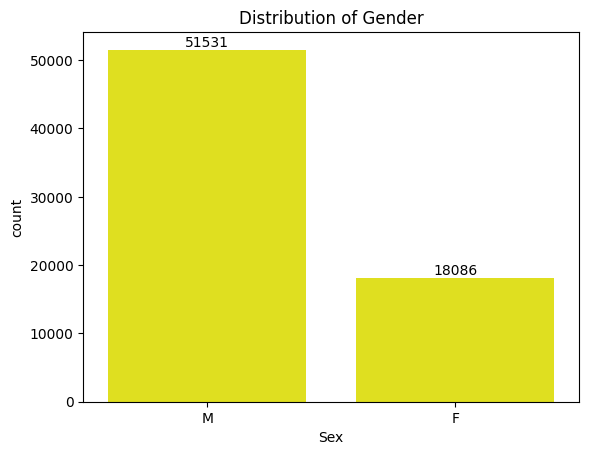

In [ ]:
ax = sns.countplot(data= df, x = "Sex", color = "yellow")
for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Distribution of Gender")
plt.show()

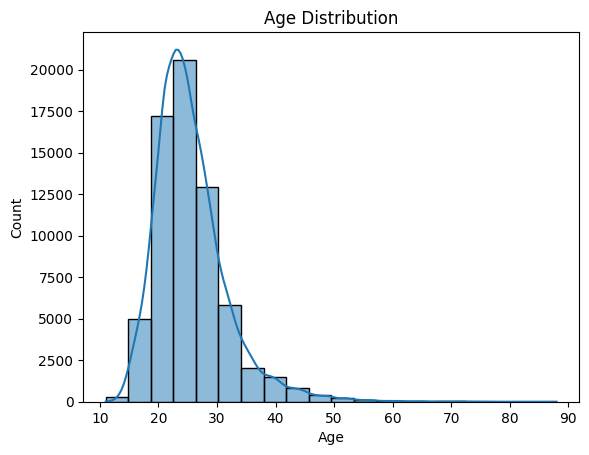

In [ ]:
sns.histplot(data=df, x = "Age", bins = 20, kde= True)
plt.title("Age Distribution")
plt.show()

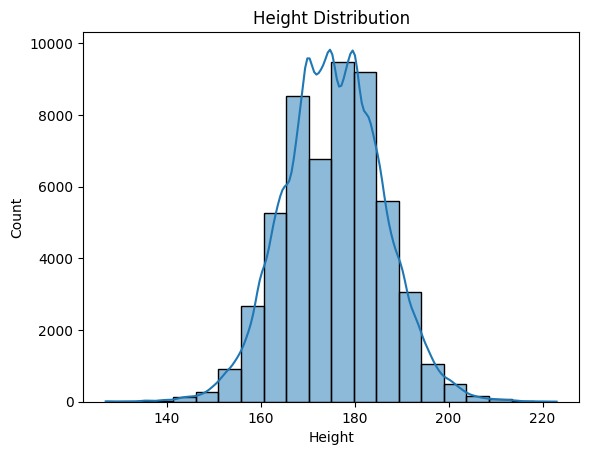

In [ ]:
sns.histplot(data=df, x = "Height", bins = 20, kde= True)
plt.title("Height Distribution")
plt.show()

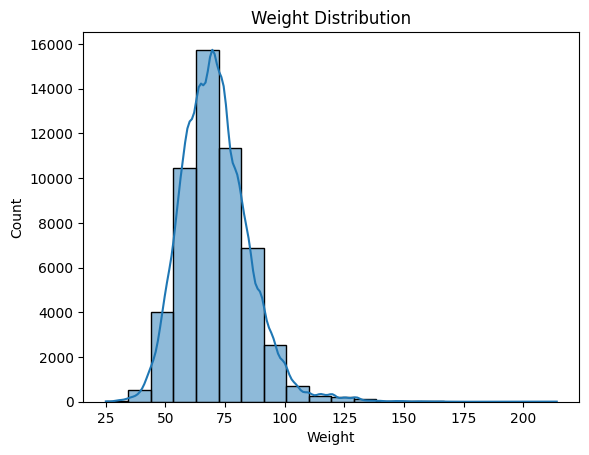

In [ ]:
sns.histplot(data=df, x = "Weight", bins = 20, kde= True)
plt.title("Weight Distribution")
plt.show()

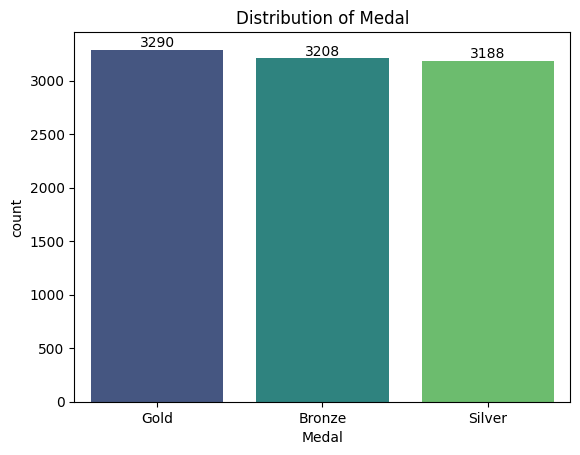

In [ ]:
ax = sns.countplot(data= df, x = "Medal", palette = "viridis")
for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Distribution of Medal")
plt.show()

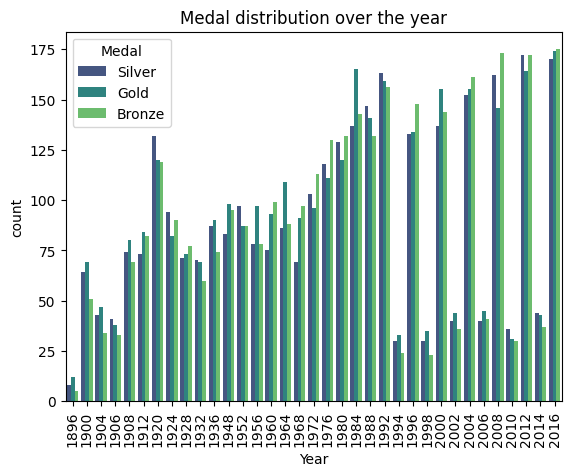

In [ ]:
sns.countplot(data= df, x = "Year",hue = "Medal", palette = "viridis")
plt.title("Medal distribution over the year")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
year_avg_age = df.groupby("Year")["Age"].mean()
year_avg_age

,Age
Year,
1896,23.029412
1900,29.119883
1904,27.063241
1906,26.989474
1908,27.000000
1912,27.965552
1920,29.241135
1924,28.252267
1928,27.973564


In [ ]:
sport_median_heighest = df.groupby("Sport")["Height"].median()
sport_median_heighest.max()

190.0

In [ ]:
sport_median_heighest[sport_median_heighest == 190.0]

,Height
Sport,
Basketball,190.0


In [ ]:
country_gender_count = df.groupby(["NOC","Sex"])["ID"].count().reset_index()
country_gender_count

,NOC,Sex,ID
0,AFG,M,38
1,AHO,F,6
2,AHO,M,27
3,ALB,F,4
4,ALB,M,7
...,...,...,...
427,YUG,M,455
428,ZAM,F,3
429,ZAM,M,40
430,ZIM,F,41


In [ ]:
country_gold_medals = df[df["Medal"]== "Gold"].groupby("NOC")["Medal"].count()
country_gold_medals

,Medal
NOC,
ALG,1
ANZ,7
ARG,25
ARM,1
AUS,98
...,...
URU,13
USA,747
UZB,4


In [ ]:
sport_gender_avg_weight = df.groupby(["Sport","Sex"])["Weight"].mean().reset_index()
sport_gender_avg_weight

,Sport,Sex,Weight
0,Alpine Skiing,F,62.154589
1,Alpine Skiing,M,77.725309
2,Alpinism,F,NaN
3,Alpinism,M,NaN
4,Archery,F,61.023256
...,...,...,...
109,Water Polo,M,87.584973
110,Weightlifting,F,66.189474
111,Weightlifting,M,79.927852
112,Wrestling,F,58.169014


In [ ]:
#individual sport
sport_gender_avg_weight = df.groupby(["Sport","Sex"])["Weight"].mean().reset_index()
display(sport_gender_avg_weight[sport_gender_avg_weight["Sport"] == "Wrestling"])

,Sport,Sex,Weight
112,Wrestling,F,58.169014
113,Wrestling,M,77.256240


In [ ]:
#individual sport and Gender
sport_gender_avg_weight = df.groupby(["Sport","Sex"])["Weight"].mean().reset_index()
display(sport_gender_avg_weight[(sport_gender_avg_weight["Sport"] == "Wrestling") & (sport_gender_avg_weight["Sex"] == "F")])

,Sport,Sex,Weight
112,Wrestling,F,58.169014


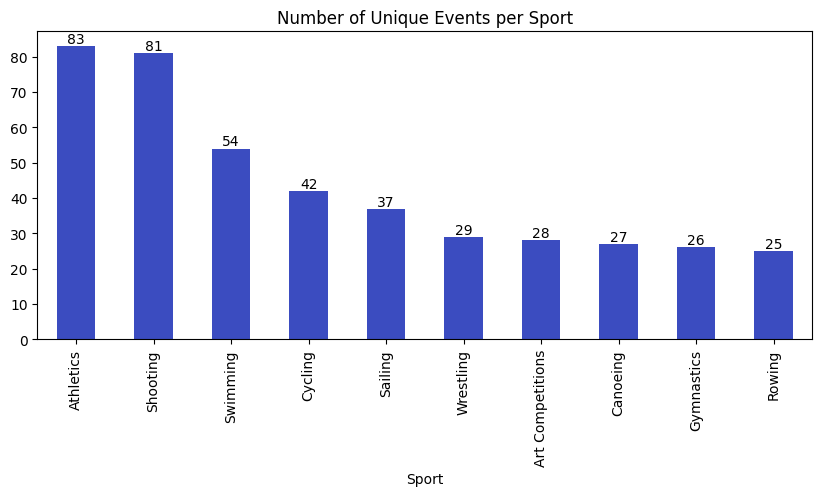

In [9]:
plt.figure(figsize=(10,4))
sport_event_count= df.groupby("Sport")["Event"].nunique().sort_values(ascending = False).head(10)
ax = sport_event_count.plot(kind = "bar",colormap = "coolwarm")
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('Number of Unique Events per Sport')
plt.xlabel('Sport')
plt.xticks(rotation = 90)
plt.show()

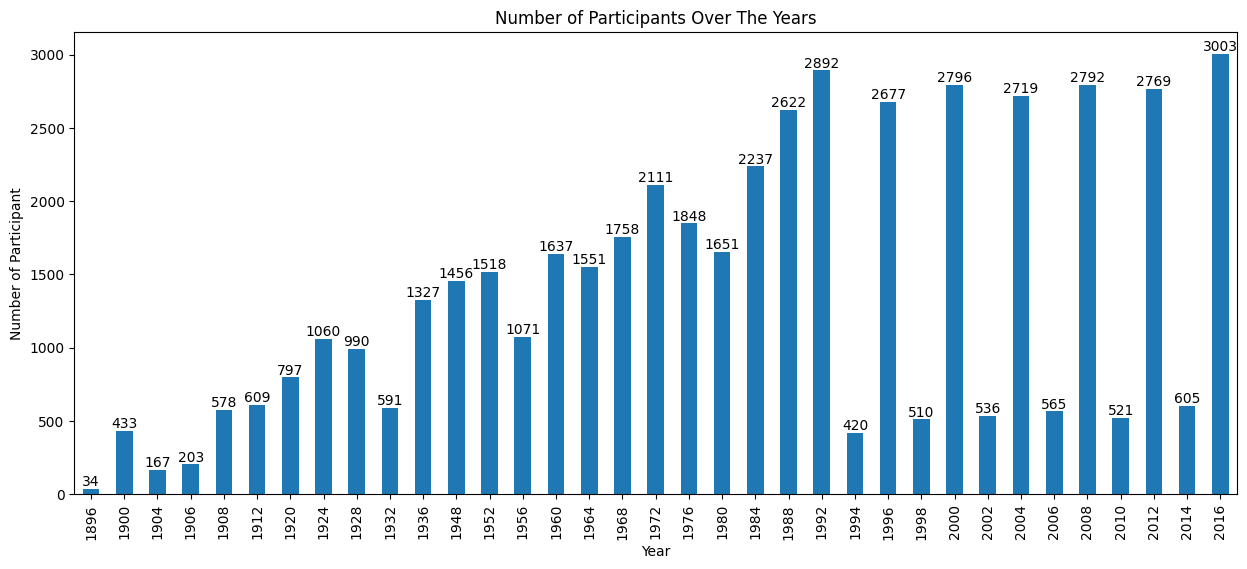

In [13]:
plt.figure(figsize=(15,6))
year_participant_count = df.groupby("Year")["ID"].nunique()
ax = year_participant_count.plot(kind = "bar")
for bar in ax.containers:
  ax.bar_label(bar)
plt.title("Number of Participants Over The Years")
plt.xlabel("Year")
plt.ylabel("Number of Participant")
plt.show()

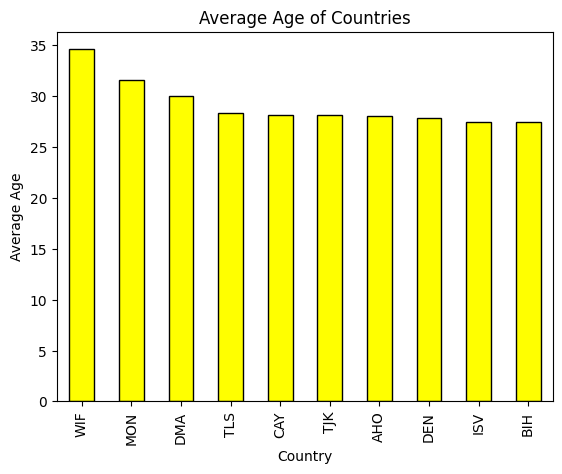

In [18]:
country_avg_age = df.groupby("NOC")["Age"].mean().sort_values(ascending = False)
ax = country_avg_age.head(10).plot(kind = "bar",color = "yellow",edgecolor = "black")
plt.title("Average Age of Countries")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.xticks(rotation= 90)
plt.show()

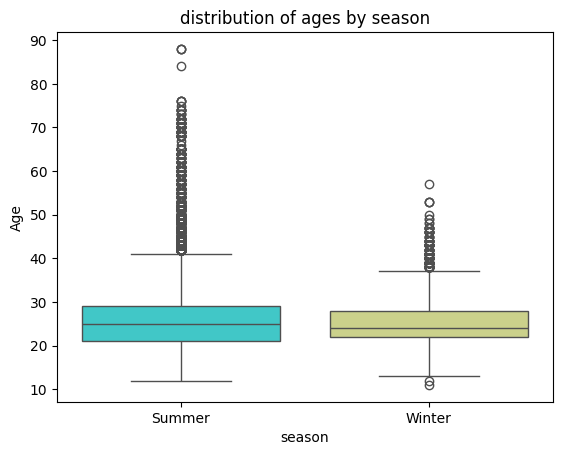

In [20]:
sns.boxplot(data = df,x= "Season", y = 'Age',palette = "rainbow")
plt.title("distribution of ages by season")
plt.xlabel("season")
plt.ylabel("Age")
plt.show()

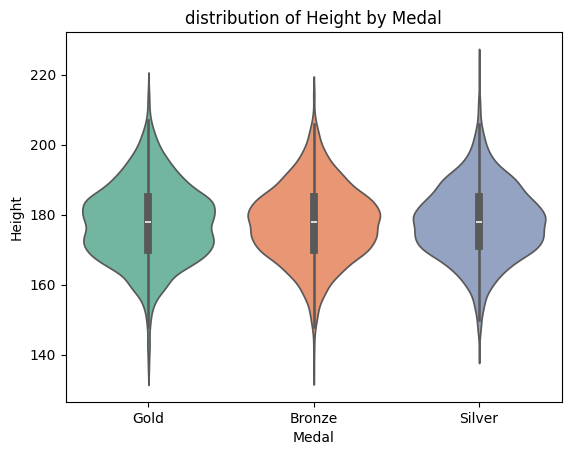

In [24]:
ax = sns.violinplot(data = df,x= "Medal", y = 'Height',palette = "Set2")
plt.title("distribution of Height by Medal")
plt.xlabel("Medal")
plt.ylabel("Height")
plt.show()

In [27]:
most_medal_country = df["NOC"].value_counts().idxmax()
print("most Medal-winning Country: ",most_medal_country)

most Medal-winning Country:  USA


In [30]:
tallest_athlete = df[df["Height"]== df["Height"].max()]
print("tallest_athlete")
print(tallest_athlete[["ID","Name","Height","Sport"]])

tallest_athlete
          ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


In [31]:
tallest_athlete = df[df["Weight"]== df["Weight"].min()]
print("tallest_athlete")
print(tallest_athlete[["ID","Name","Height","Sport"]])

tallest_athlete
          ID            Name  Height       Sport
40849  21049  Choi Myong-Hui   135.0  Gymnastics
40850  21049  Choi Myong-Hui   135.0  Gymnastics
40851  21049  Choi Myong-Hui   135.0  Gymnastics
40852  21049  Choi Myong-Hui   135.0  Gymnastics
40853  21049  Choi Myong-Hui   135.0  Gymnastics
40854  21049  Choi Myong-Hui   135.0  Gymnastics


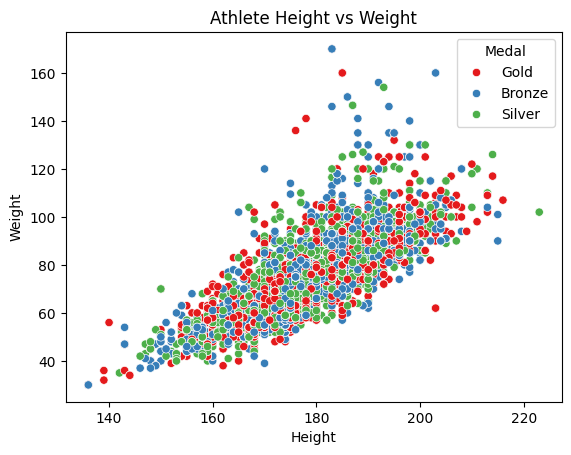

In [34]:
sns.scatterplot(data = df,x = "Height",y = "Weight", hue = "Medal",palette = "Set1")
plt.title("Athlete Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title = "Medal")
plt.show()

In [37]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

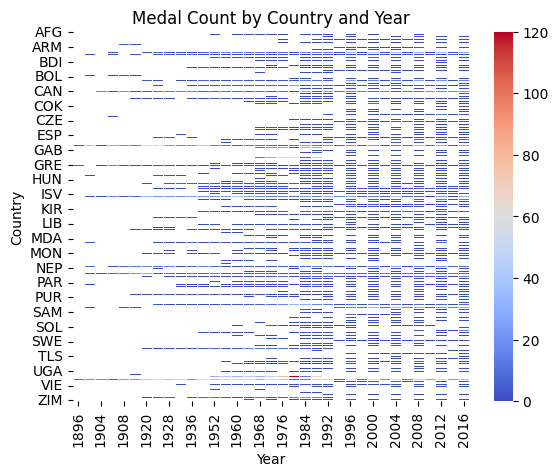

In [40]:
medal_by_country_year = df.pivot_table(index = "NOC",columns = "Year",values = "Medal",aggfunc = "count")
sns.heatmap(medal_by_country_year,cmap = "coolwarm",linewidths = 0.5)
plt.title("Medal Count by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.xticks(rotation = 90)
plt.show()